### DIABETES PREDICTION USING MACHINE LEARNING

Diabetes is a chronic medical condition characterized by high levels of blood sugar (glucose) due to the body's inability to produce or effectively use insulin, a hormone that regulates blood sugar. It is a major global health issue, with millions of people affected worldwide, leading to serious complications such as heart disease, kidney failure, and vision loss. Early detection and management of diabetes are crucial for reducing these risks. In recent years, machine learning models have been employed to predict diabetes onset, using data such as patient demographics, lifestyle factors, blood_glucose_level, Hemoglobin A1c level and medical history, to aid in early diagnosis and personalized healthcare.

#### Problem Statement and Objective

#### Problem Statement and Objective

Gilead Health Clinic is grappling with the growing challenge of effectively managing and preventing diabetes, a condition that poses severe health risks to patients and significant costs to healthcare systems. Despite efforts to identify at-risk individuals, the current strategies lack the precision necessary for early detection and intervention. <br>
The dataset(patients' data) was obtained from Gilead Health Clinic and the goal is to predict the likelihood of diabetes onset by developing a robust diabetes prediction model to accurately identify individuals at risk of developing diabetes, allowing for timely and targeted preventive measures.

This initiative will empower Gilead Health Clinic to enhance patient outcomes, reduce the burden on healthcare resources, and play a proactive role in combating the diabetes epidemic.

#### Details of the dataset:
The datasets consists of several medical predictor variables and one target variable, Diabetes.

- gender - Gender of the individual (e.g., 'Male', 'Female').
- age - Age of the individual in years.
- hypertension - Whether the individual has hypertension (0 = No, 1 = Yes).
- heart_disease - Whether the individual has heart disease (0 = No, 1 = Yes).
- smoking_history - Smoking history of the individual (e.g., 'never', 'former', 'current').
- bmi - Body Mass Index (BMI) of the individual.
- HbA1c_level - Hemoglobin A1c level, indicating average blood sugar levels over the past 3 months.
- blood_glucose_level - Current blood glucose level of the individual.
- diabetes - Target variable indicating whether the individual has diabetes (0 = No, 1 = Yes).

##### Number of variables: 9
##### Number of observation units: 100000

**Research:**

**BMI**
- Minimum Plausible BMI: Approximately 10-12. Extremely low BMI values are rarely observed in healthy individuals. A BMI below 13 often indicates severe malnutrition or medical conditions like anorexia nervosa. A BMI around 10 is typically fatal, reflecting extreme undernourishment or life-threatening illnesses.
- Maximum Plausible BMI: Approximately 60-70 or higher in rare cases. Extremely high BMIs indicate severe obesity. Values above 40 fall into the "morbidly obese" category, while those over 50 are often classified as "super-obese." The highest recorded BMIs can reach 90+, but this generally reflects severe health risks, including cardiovascular diseases and reduced life expectancy.

- The normal BMI for most healthy adults typically falls between 18.5 and 24.9. Values outside this range indicate potential health concerns requiring further evaluation.

**HbA1c_level**
- Normal Range: Below 5.7%
- Pre-diabetes: 5.7% to 6.4%
- Diabetes: 6.5% or higher.

**Blood Glucose Level:**
- Minimum value: Approximately 40-50 mg/dL (2.2-2.8 mmol/L). Levels below 70 mg/dL are considered hypoglycemic, but values below 40-50 mg/dL can be life-threatening.
- Maximum value: Approximately 600-800 mg/dL (33-44 mmol/L). Normal blood glucose after meals shouldn't exceed 180 mg/dL. However, in extreme cases like hyperosmolar hyperglycemic state (HHS) or diabetic ketoacidosis (DKA), blood glucose can spike to 600 mg/dL or more. Levels above 800 mg/dL are exceedingly rare and often fatal without urgent medical intervention.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load and preview data

data = pd.read_csv('diabetes_prediction_dataset.csv')

data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# check data types
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

There is need to convert age to integer

In [6]:
# convert age column to integer
data["age"] = data["age"].astype(int)

In [7]:
# confirm data types
data.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [8]:
# check the dimension opf the dataset
data.shape

(100000, 9)

In [9]:
# Checking for missing values
missing = pd.DataFrame(data.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/data.shape[0])*100, 2)
missing[missing['Amount'] != 0]

,Amount,Percentage


In [10]:
# Checking for duplicates

duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
total_rows = data.shape[0]
duplicate_percentage = (num_duplicates / total_rows) * 100

print('Number of duplicate rows:', num_duplicates)
print(f'Percentage of duplicate rows: {duplicate_percentage:.2f}%')


Number of duplicate rows: 3888
Percentage of duplicate rows: 3.89%


In [11]:
# drop duplicates

data = data.drop_duplicates(keep = "first")

data.shape

(96112, 9)

In [12]:
# Inspecting unique values per column

for col in data.columns:
    print(col)
    print(data[col].nunique())

gender
3
age
81
hypertension
2
heart_disease
2
smoking_history
6
bmi
4247
HbA1c_level
18
blood_glucose_level
18
diabetes
2


In [13]:
# check the descriptive statistics of the data

# Inspecting unique values per column

data.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,96112.0,41.798287,22.472901,0.00,24.0,43.00,59.00,80.00
hypertension,96112.0,0.077628,0.267587,0.00,0.0,0.00,0.00,1.00
heart_disease,96112.0,0.040817,0.197867,0.00,0.0,0.00,0.00,1.00
bmi,96112.0,27.321923,6.768534,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96112.0,5.532618,1.073288,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96112.0,138.221013,40.911287,80.00,100.0,140.00,159.00,300.00
diabetes,96112.0,0.088251,0.283661,0.00,0.0,0.00,0.00,1.00


**Observations from the descriptive statistics**
- The minimum age is 0.0 years, while the maximum is 80 years. The extremely low minimum age might account for infants who are less than 1 year of age, but requires further investigation because of possible data entry errors.
- The minimum BMI of 10 is not healthy. It is indicative of medical conditions that requires urgent attention.
- The maximum BMI of 95.69 exceeds the plausible upper limit, this could be a pointer to a critical medical condition or the presence of an outlier.
- The minimum HbA1c level of 3.5%  is lower than the palusible minimum, while the maximum HbA1c level of 9% is above the plausible maximum.

## Numerical Features
#### Histogram and Box plot

In [ ]:
# create a function for histogram and box plot of numerical features

# investigate age against BMI to identify outliers
def create_box_histplot(data,columns= [] ,hist = False, box = False):
    # make a copy of dataframe
    df = data.copy()

    ncolumns = len(columns)
    
    # Set number of columns and dynamic figure size
    subplot_width = 5  
    subplot_height = 5  
    figsize = (ncolumns * subplot_width, subplot_height)     
    fig, axes = plt.subplots(nrows=1, ncols=ncolumns,figsize = figsize)
    
    for index, feature in enumerate(columns):
        if hist == True:
            sns.histplot(data = df[feature], ax = axes[index])
        if box == True:
            sns.boxplot(data = df[feature], ax=axes[index])
    plt.tight_layout()
    plt.show();

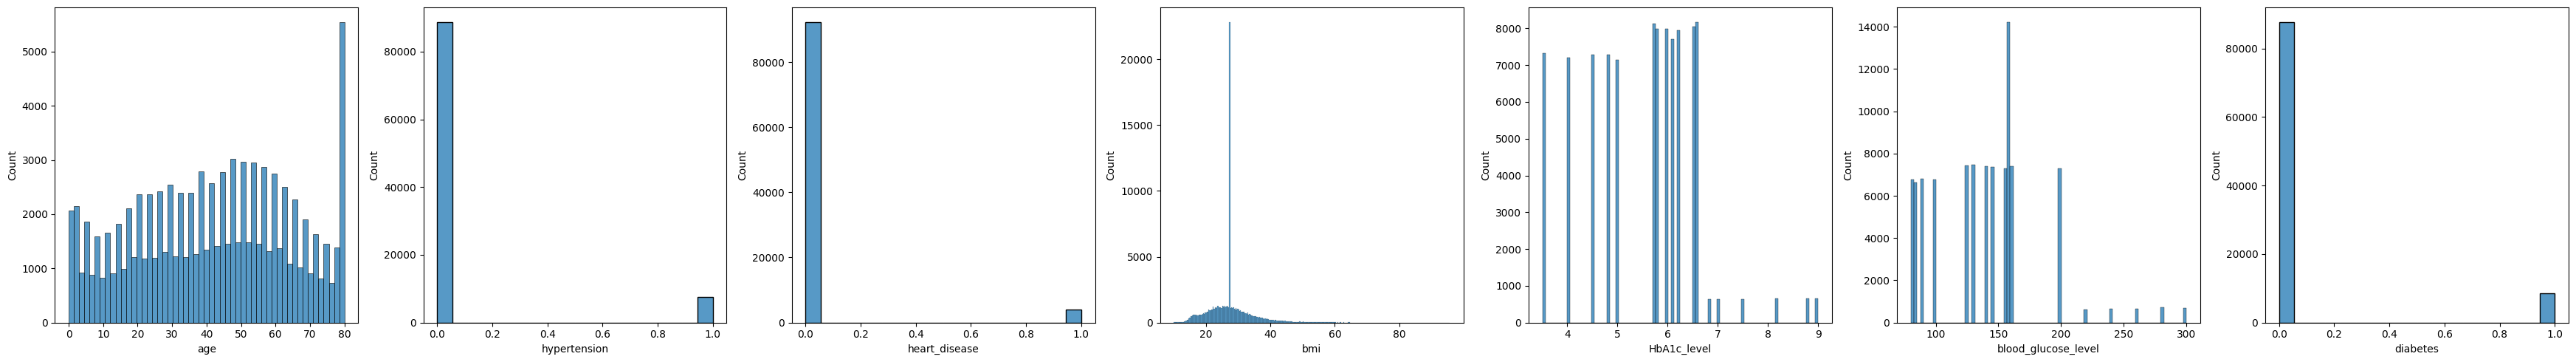

In [15]:
# histogram
create_box_histplot(data=data, columns = data.select_dtypes(exclude = 'object').columns.to_list(),hist = True)

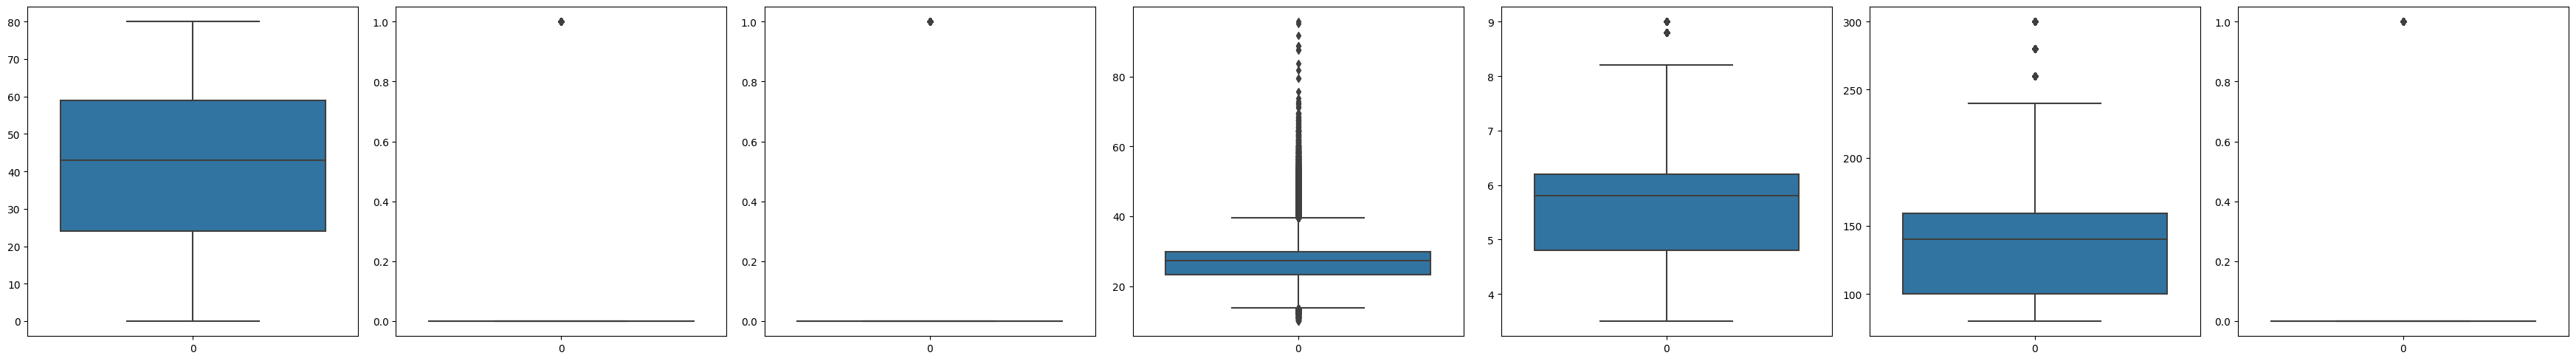

In [16]:
# boxplot
create_box_histplot(data=data, columns = data.select_dtypes(exclude = 'object').columns.to_list(), box= True)

In [17]:
# functions to calculate outliers

# write a fuction to calculate outliers
def find_outliers(data,feature, upper = False, lower = False):
    target_feature = "diabetes"
    # make a copy of dataframe
    df = data.copy()
     
    # calculate Q1 and Q3 and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # find lower and upper bound
    if lower == True:
        lower_bound = Q1 - (IQR *1.5)
        outlier_df = df[df[feature] < lower_bound]
        print(f"lower bound of {feature} is: {lower_bound}")
    if upper == True:
        upper_bound = Q3 + (IQR * 1.5)
        outlier_df = df[df[feature] > upper_bound]
        print(f"Upper bound of {feature} is: {upper_bound}")
        
    print(f"the dimension of outliers is {outlier_df.shape}\n")
    print(f" the distribution of target features in outlier is {outlier_df[target_feature].value_counts()}")

In [18]:
# find upper outliers for BMI

find_outliers(data=data, feature="bmi", upper=True)

Upper bound of bmi is: 39.55
the dimension of outliers is (4940, 9)

 the distribution of target features in outlier is diabetes
0    3681
1    1259
Name: count, dtype: int64


In [19]:
# find lower outliers for BMI

find_outliers(data=data, feature="bmi", lower=True)

lower bound of bmi is: 13.709999999999997
the dimension of outliers is (414, 9)

 the distribution of target features in outlier is diabetes
0    406
1      8
Name: count, dtype: int64


In [20]:
# find outliers in HbA1c_level

find_outliers(data=data, feature="HbA1c_level", upper=True)

Upper bound of HbA1c_level is: 8.3
the dimension of outliers is (1312, 9)

 the distribution of target features in outlier is diabetes
1    1312
Name: count, dtype: int64


- This accounts for over 1,000 observations. Resolving to the removal of these outliers will lead to loss of information.

In [21]:
# Find outliers in blood glucose level

find_outliers(data=data, feature="blood_glucose_level", upper=True)

Upper bound of blood_glucose_level is: 247.5
the dimension of outliers is (2031, 9)

 the distribution of target features in outlier is diabetes
1    2031
Name: count, dtype: int64


- This accounts for over 2,000 observations. Removal will lead to loss of data.

## Categorical Features

In [22]:
# categorical features
categorical_data = data.select_dtypes(include = "object")
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [23]:
cat_list = categorical_data.columns.to_list()

for feature in cat_list:
    print(categorical_data[feature].value_counts(),"\n")

gender
Female    56142
Male      39952
Other        18
Name: count, dtype: int64 

smoking_history
never          34398
No Info        32853
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64 



Observation
- Similar categories: 'Former smokers' and 'Never smoker' are both 'not current smokers'.

#### Combine former, never and not current as not current

In [24]:
data['smoking_history'] = data['smoking_history'].replace(['former', 'never'], 'not current')


In [25]:
data['smoking_history'].value_counts()


smoking_history
not current    50064
No Info        32853
current         9197
ever            3998
Name: count, dtype: int64

#### Check for relationship between age, BMI and smoking history

Individuals below the agee of 10 year but has smoking history

In [26]:
below_adolescence = data[data["age"] <= 10]

In [27]:
below_adolescence["smoking_history"].value_counts()

smoking_history
No Info        8757
not current    1510
current          21
ever              4
Name: count, dtype: int64

In [28]:
below_adolescence[below_adolescence["smoking_history"] == "ever"]["diabetes"].value_counts()

diabetes
0    3
1    1
Name: count, dtype: int64

In [29]:
below_adolescence[below_adolescence["smoking_history"] == "current"]["diabetes"].value_counts()

diabetes
0    21
Name: count, dtype: int64

The records are invalid because it is highly unlikely for children under 10 to have a legitimate smoking history. Therefore the records would be removed


In [30]:
# Filter and drop records where age is 10 or below and smoking history is either "current" or "past_smoker"
filtered_data = data[~((data["age"] <= 10) & 
                      (data["smoking_history"].isin(["current", "ever"])))]

In [31]:
# check the filtered data
filtered_data[filtered_data["age"] <=10]["smoking_history"].unique()

array(['No Info', 'not current'], dtype=object)

#### Save the clean data

In [32]:
filtered_data.to_csv("clean_data.csv", index = False)